# 🚀 NASA Meteorite Landings Project
Analyzing real meteorite landing data using pandas, matplotlib, seaborn, and folium.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline  


In [3]:
def load_and_clean(filename='meteorite_landings.csv'):
    df = pd.read_csv(filename)
    df = df.dropna(subset=['year', 'reclat', 'reclong', 'mass (g)'])
    df['year_only'] = df['year'].astype(int)
    df = df[df['year_only'].between(860, 2025)]
    print("✅ Cleaned data:", len(df), "records")
    print("📅 Unique years:", df['year_only'].nunique())
    print("📅 Top years:\n", df['year_only'].value_counts().head(10))
    return df

df = load_and_clean()


✅ Cleaned data: 38114 records
📅 Unique years: 252
📅 Top years:
 year_only
1979    3045
1988    2295
1998    2147
2003    1754
2006    1616
1999    1592
1990    1506
1997    1505
2000    1502
2009    1496
Name: count, dtype: int64


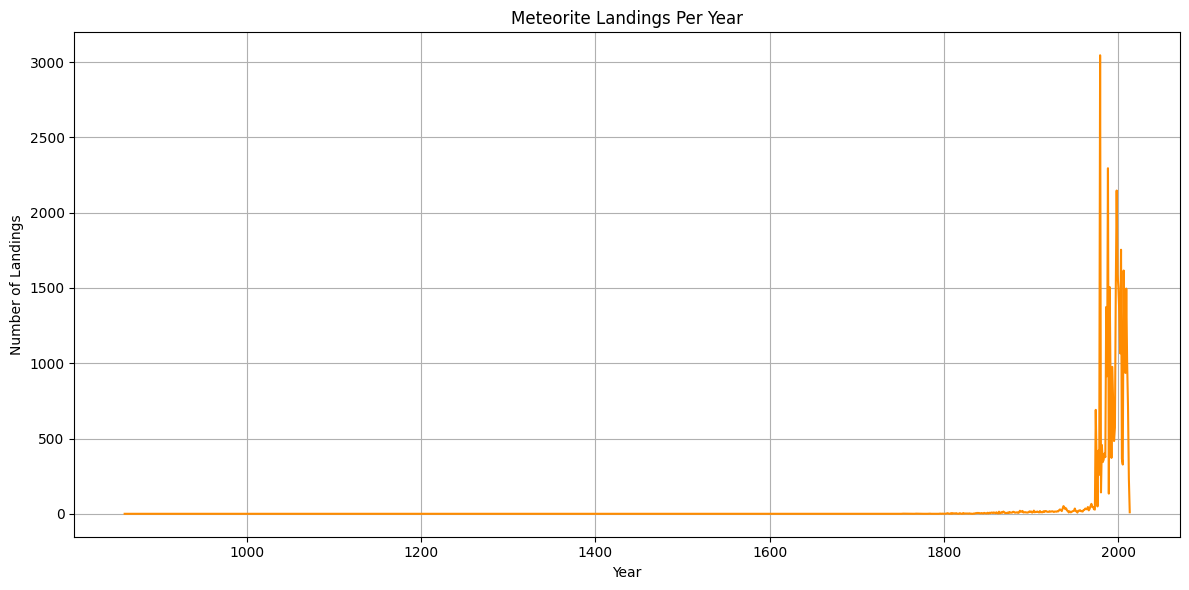

In [4]:
def plot_landings_over_time(df):
    year_counts = df['year_only'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(year_counts.index, year_counts.values, color='darkorange')
    plt.title("Meteorite Landings Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Landings")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_landings_over_time(df)


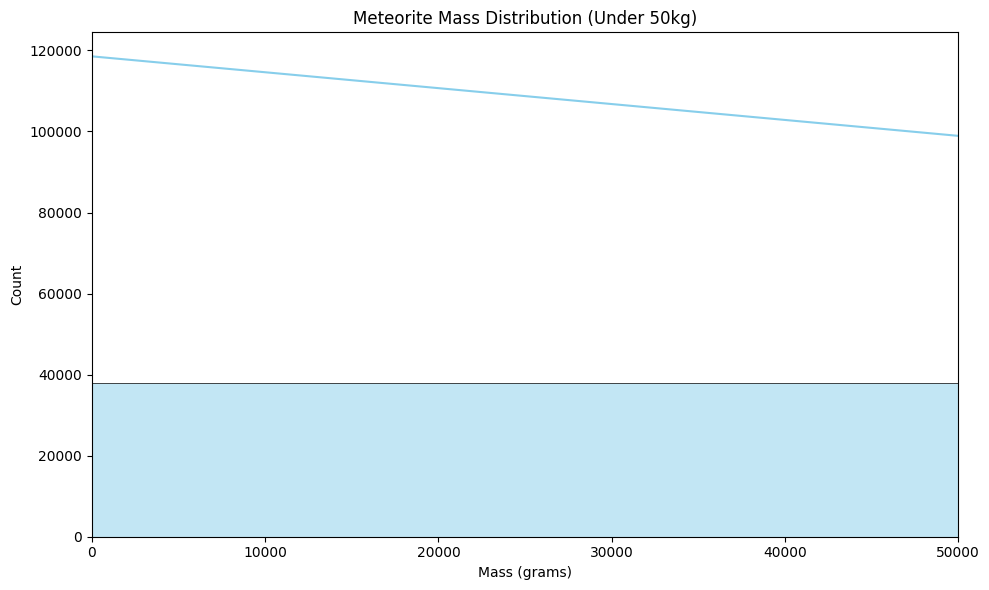

In [5]:
def plot_mass_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['mass (g)'], bins=100, kde=True, color='skyblue')
    plt.xlim(0, 50000)
    plt.title("Meteorite Mass Distribution (Under 50kg)")
    plt.xlabel("Mass (grams)")
    plt.tight_layout()
    plt.show()

plot_mass_distribution(df)


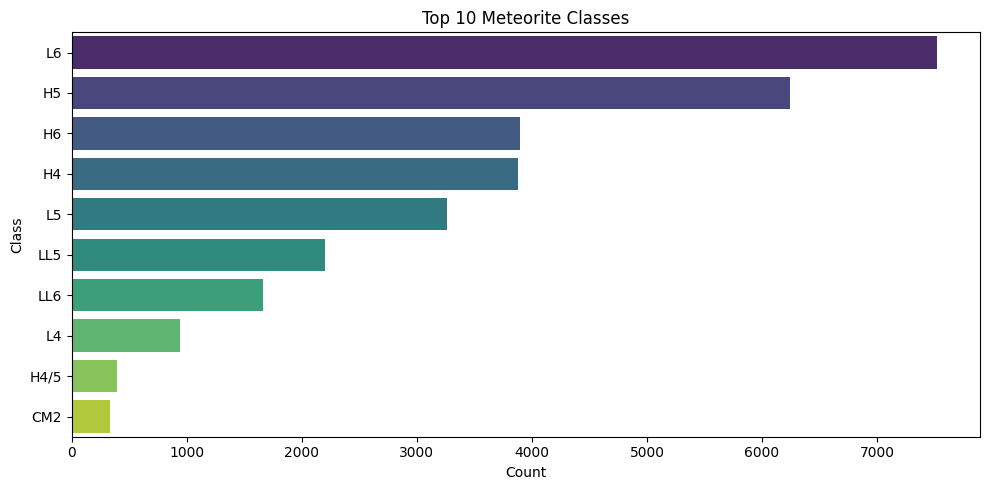

In [8]:
def plot_top_classes(df):
    top_classes = df['recclass'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(
    x=top_classes.values,
    y=top_classes.index,
    hue=top_classes.index,       # Assign hue to y labels
    palette='viridis',
    legend=False                 # Hide legend since it's same as y-axis
)
    plt.title("Top 10 Meteorite Classes")
    plt.xlabel("Count")
    plt.ylabel("Class")
    plt.tight_layout()
    plt.show()

plot_top_classes(df)



In [9]:
def create_map(df, num_points=500):
    world_map = folium.Map(location=[0, 0], zoom_start=2)
    sample_df = df.sample(min(num_points, len(df)))
    for _, row in sample_df.iterrows():
        mass = row['mass (g)']
        color = 'red' if mass > 50000 else 'blue'
        popup_text = f"{row['name']}<br>{int(mass)}g"
        popup = folium.Popup(popup_text, parse_html=True)
        folium.CircleMarker(
            location=[row['reclat'], row['reclong']],
            radius=4,
            color=color,
            fill=True,
            fill_opacity=0.6,
            popup=popup
        ).add_to(world_map)
    return world_map

map_display = create_map(df)
map_display
